## Visualizando das séries temporais 

#### Este código apresentar algumas ferramentas para visualização dos dados obtidos pelos modelos de ET

In [11]:
import pandas as pd

try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns 

try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

#### Lendo as tabelas csv utilizando pandas, e removendo valores noData

###

In [12]:

ptjpl_file = 'data/ptjpl/ptjpl_example.csv'

ssebop_file = 'data/ssebop/ssebop_example.csv'

df = pd.read_csv(ptjpl_file)
df['date'] = pd.to_datetime(df['Unnamed: 0'])

df_ssebop = pd.read_csv(ssebop_file)
df_ssebop['date'] = pd.to_datetime(df['Unnamed: 0'])

# removing null values
df = df[df['et_fraction']>0].reset_index()
df_ssebop = df_ssebop[df_ssebop['et_fraction']>0].reset_index()

In [13]:
df_ssebop.head()

,index,Unnamed: 0,ndvi,et,et_reference,et_fraction,date
0,0,2018-01-09,0.886899,3.755770,5.193766,0.723130,2018-01-09
1,4,2018-03-14,0.478672,2.900616,4.702967,0.616763,2018-03-14
2,6,2018-03-30,0.512190,2.484345,4.252199,0.584249,2018-03-30
3,7,2018-04-23,0.577786,2.865027,2.886883,0.992429,2018-04-23
4,8,2018-05-01,0.837812,3.038007,3.452291,0.879998,2018-05-01


In [14]:
df.head()

,index,Unnamed: 0,ndvi,et,et_fraction,date
0,0,2018-01-09,0.886899,4.886438,0.940827,2018-01-09
1,2,2018-02-18,0.288084,2.569489,0.608438,2018-02-18
2,4,2018-03-14,0.478672,4.942196,1.050868,2018-03-14
3,6,2018-03-30,0.512190,4.480846,1.053771,2018-03-30
4,8,2018-05-01,0.837812,3.070899,0.889525,2018-05-01


#### Plotando a série temporal

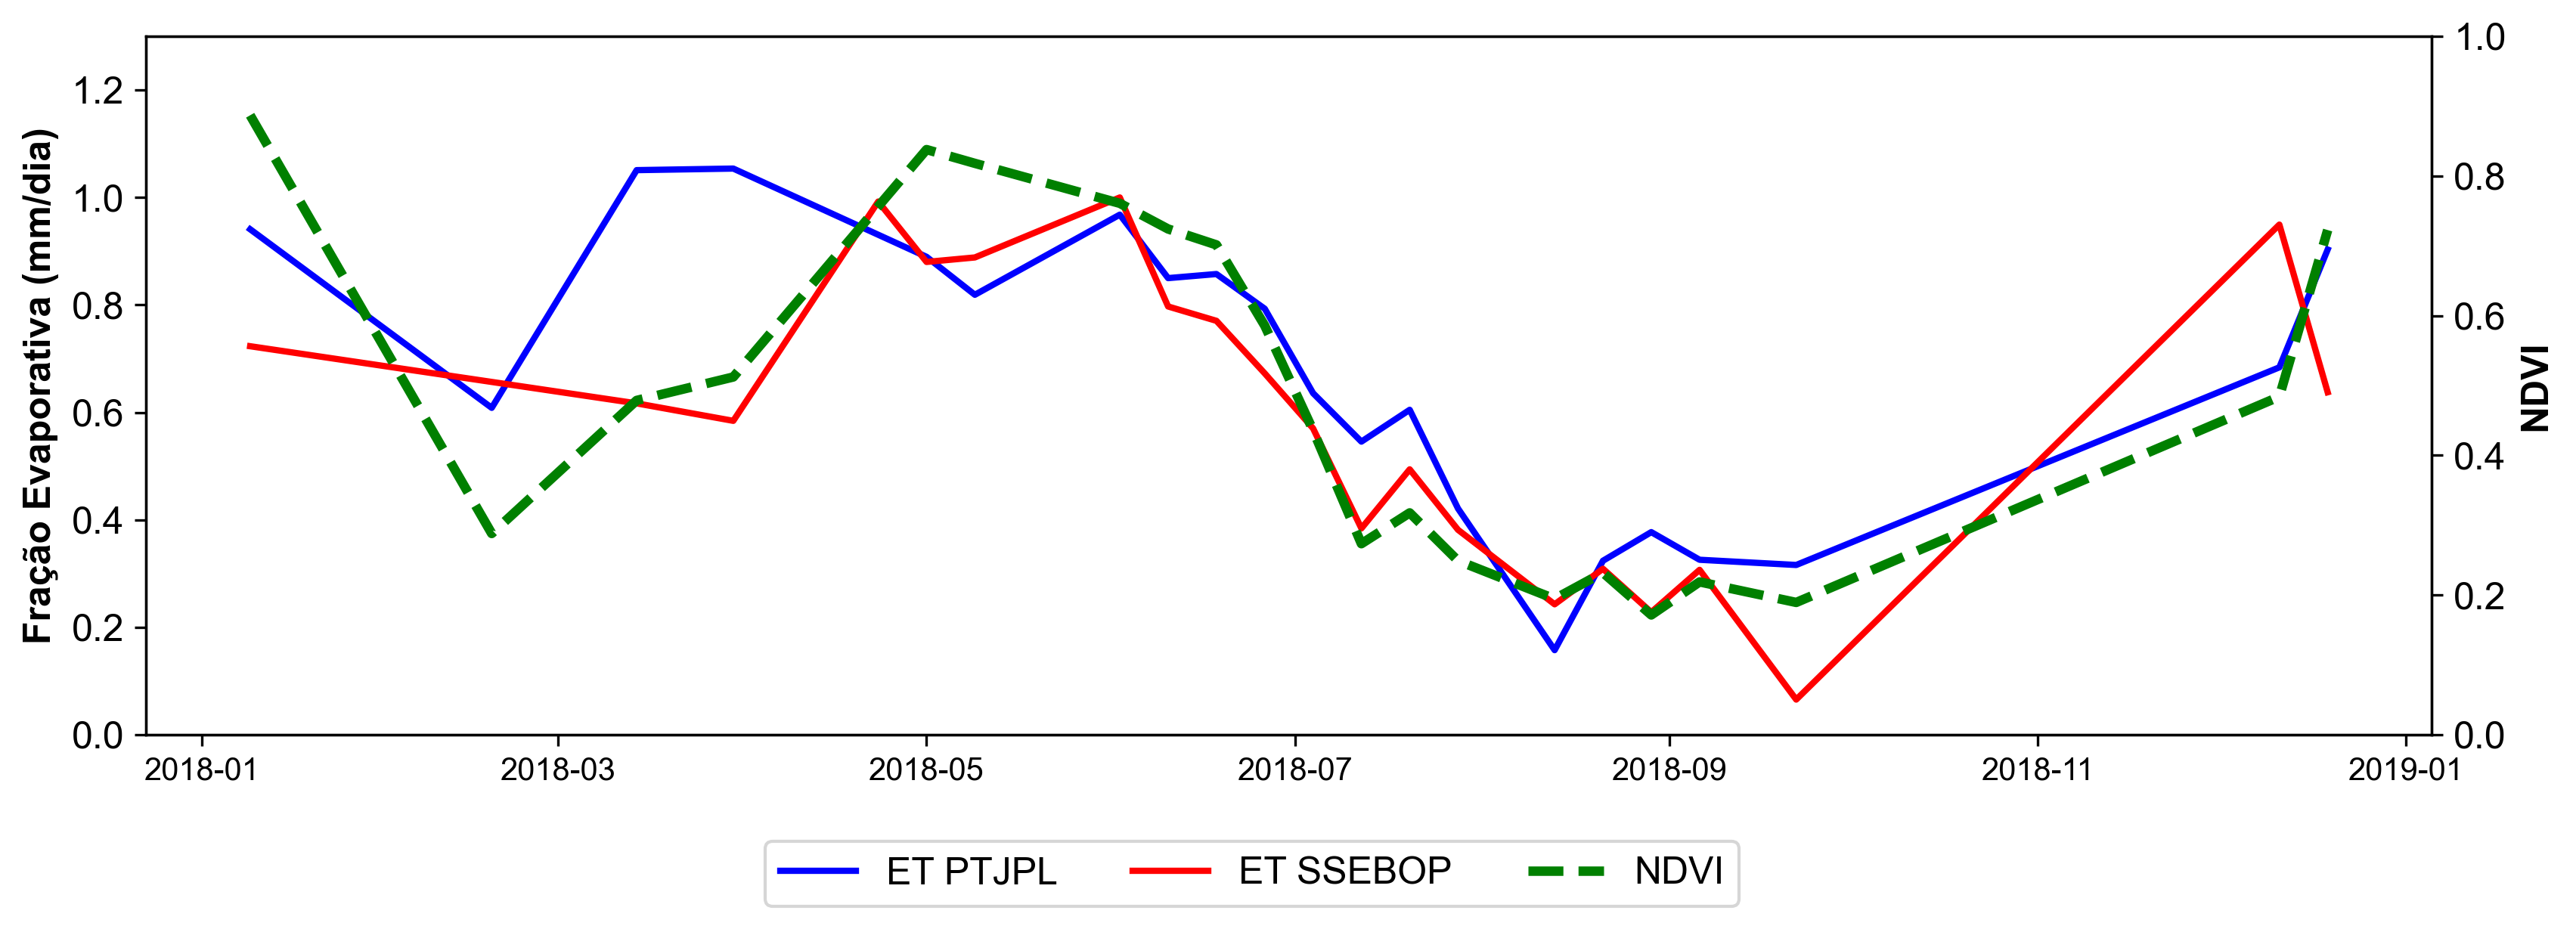

In [10]:
%matplotlib inline 

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 16

fig = plt.figure(figsize=(13,4),dpi= 300)

ax1 = plt.subplot(1,1,1)
ax1.set_ylim([0,1.3])

# ptjpl
ax1.plot(df['date'],df['et_fraction'], color='blue',lw=2,label='ET PTJPL')

# ssebop
ax1.plot(df_ssebop['date'],df_ssebop['et_fraction'], color='red',lw=2,label='ET SSEBOP')

ax1.set_ylabel('Fração Evaporativa (mm/dia)')


ax2 = ax1.twinx()

ax2.plot(df['date'],df['ndvi'],color='green',lw=3,ls='--', label='NDVI')
ax2.set_ylim([0,1])
ax2.set_ylabel('NDVI')

fig.legend(bbox_to_anchor=(0.5,-0.1), ncol=3, loc="lower center",)
